In [2]:
import json

In [3]:
json_data = json.load(open('topology.txt'))

In [4]:
topology = json_data['network-topology']['topology'][0]

In [46]:
nodes = []
for node in topology['node']:
    if 'node-id' in node.keys():
        node_id = node['node-id']
        temp_dict = {}
        temp_dict['id'] = node_id
        #print(node_id)
        if 'host-tracker-service:addresses' in node.keys():
            host_tracker = node['host-tracker-service:addresses']
            if host_tracker and isinstance(host_tracker, list):
                if 'ip' in host_tracker[0] and 'mac' in host_tracker[0]:
                    ip = host_tracker[0]['ip']
                    mac = host_tracker[0]['mac']
                    temp_dict['ip'], temp_dict['mac'] = ip, mac
            elif host_tracker and isinstance(host_tracker, dict):
                if 'ip' in host_tracker and 'mac' in host_tracker:
                    ip = host_tracker['ip']
                    mac = host_tracker['mac']
                    temp_dict['ip'], temp_dict['mac'] = ip, mac
            #print(ip, mac)
        if 'termination-point' in node.keys():
            termination_point_lists = []
            term_points = node['termination-point']
            if term_points and isinstance(term_points, list):
                for term_point in term_points:
                    if 'tp-id' in term_point.keys():
                        termination_point_lists.append(term_point['tp-id'])
            temp_dict['tpid'] = termination_point_lists
        nodes.append(temp_dict)
#print(nodes)

In [47]:
links = []

for link in topology['link']:
    temp_dict = {}
    if 'link-id' in link:
        link_id = link['link-id']
        temp_dict['id'] = link_id
        if 'source' in link:
            #print(link['source'])
            if 'source-tp' in link['source']:
                temp_dict['source'] = link['source']['source-tp']
            else:
                if 'source-node' in link['source']:
                    temp_dict['source'] = link['source']['source-node']
        if 'destination' in link:
            #print(link['destination'])
            if 'dest-tp' in link['destination']:
                temp_dict['target'] = link['destination']['dest-tp']
            else:
                if 'dest-node' in link['destination']:
                    temp_dict['target'] = link['destination']['dest-node']
    links.append(temp_dict)
#print(links)

In [48]:
final_topology = {'directed': False, 'graph': {}, 'nodes': nodes, 'links': links, 'multigraph': False}

In [49]:
json.dump(final_topology, open('final_output.json', 'w'),indent=2)

In [50]:
graph_data = json.load(open('final_output.json'))

In [51]:
graph_data['nodes']

[{'id': 'openflow:1',
  'tpid': ['openflow:1:2', 'openflow:1:1', 'openflow:1:LOCAL']},
 {'id': 'host:00:00:00:00:00:01',
  'ip': '10.0.0.1',
  'mac': '00:00:00:00:00:01',
  'tpid': ['host:00:00:00:00:00:01']},
 {'id': 'openflow:2',
  'tpid': ['openflow:2:LOCAL', 'openflow:2:1', 'openflow:2:2']},
 {'id': 'host:00:00:00:00:00:02',
  'ip': '10.0.0.2',
  'mac': '00:00:00:00:00:02',
  'tpid': ['host:00:00:00:00:00:02']}]

In [52]:
graph_data['links']

[{'id': 'host:00:00:00:00:00:01/openflow:1:1',
  'source': 'host:00:00:00:00:00:01',
  'target': 'openflow:1:1'},
 {'id': 'openflow:2:1/host:00:00:00:00:00:02',
  'source': 'openflow:2:1',
  'target': 'host:00:00:00:00:00:02'},
 {'id': 'openflow:1:2', 'source': 'openflow:1:2', 'target': 'openflow:2:2'},
 {'id': 'openflow:2:2', 'source': 'openflow:2:2', 'target': 'openflow:1:2'},
 {'id': 'openflow:1:1/host:00:00:00:00:00:01',
  'source': 'openflow:1:1',
  'target': 'host:00:00:00:00:00:01'},
 {'id': 'host:00:00:00:00:00:02/openflow:2:1',
  'source': 'host:00:00:00:00:00:02',
  'target': 'openflow:2:1'}]

In [96]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
G = nx.Graph()

In [101]:
node_colors, node_sizes = [],[]

for node in graph_data['nodes']:
    G.add_node(node['id'])
    node_colors.append('#1f78b4')
    node_sizes.append(2000)
    if 'tpid' in node:
        for n in node['tpid']:
            if n != node['id']:
                G.add_node(n)
                G.add_edge(node['id'],n, weight=2.0)
                node_colors.append('orange')
                node_sizes.append(300)
    if 'ip' in node and 'mac' in node:
        nx.set_node_attributes(G, {node['id'] : {'ip': node['ip'], 'mac': node['mac']}})

for link in graph_data['links']:
    G.add_edge(link['source'],link['target'], weight=0.5)

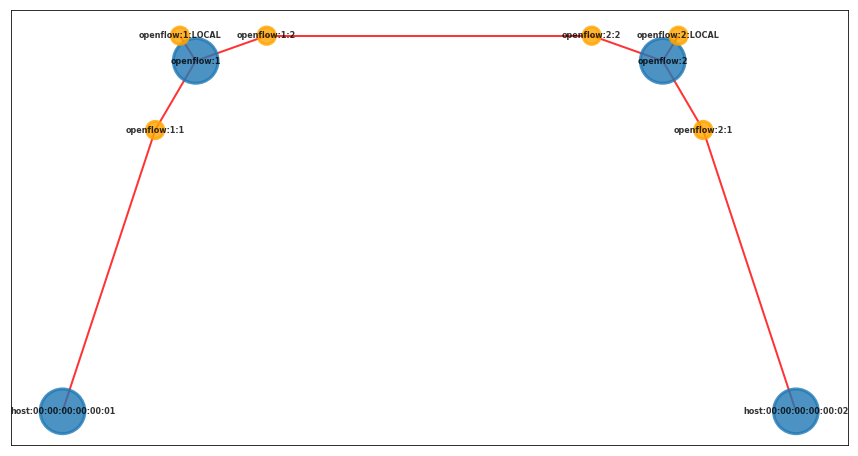

In [102]:
plt.figure(figsize=(15,8))
nx.draw_networkx(G, with_labels=True, font_weight='bold', alpha=0.8, pos=nx.spectral_layout(G), width=2.0, linewidths=3.0, 
                     edge_color='red',font_size=8,
                    node_size=node_sizes, node_color=node_colors)
plt.savefig('out.png')

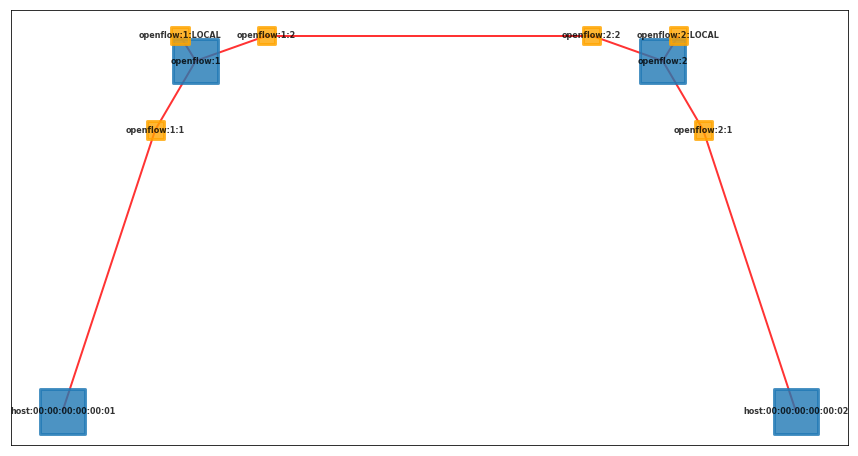

In [103]:
plt.figure(figsize=(15,8))
nx.draw_networkx(G, with_labels=True, font_weight='bold', alpha=0.8, pos=nx.spectral_layout(G), width=2.0, linewidths=3.0, 
                     edge_color='red',font_size=8,
                    node_size=node_sizes, node_color=node_colors, node_shape='s')
plt.savefig('out2.png')

<Figure size 432x288 with 0 Axes>